**Analyzing a Data Set for Machine Learning**

In this notebook we'll fetch some data and run various code to explore and visualize that data to gain insights about it. This isn't "machine learning" code, it's "data scientist learning about the shape of the data before deciding how to use it in ML" code.

We'll be using the California Housing Prices dataset from the StatLib repository. This dataset is based on data from the 1990 California census.

In [59]:
print("Welcome to Machine Learning at GHP 2023!")

Welcome to Machine Learning at GHP 2023!


# Check System Requirements

This project requires Python 3.7 or above:

In [60]:
import sys

print (sys.version_info)
assert sys.version_info >= (3, 7)

sys.version_info(major=3, minor=11, micro=2, releaselevel='final', serial=0)


It also requires Scikit-Learn ≥ 1.0.1:

In [61]:
from packaging import version
import sklearn

print (version.parse(sklearn.__version__))
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

1.2.2


# Get the Data

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

## Download the Data

Our data file is a single compressed file that we will unpack into a CSV (Comma-Separated Values) file. We put some extra checks in to ensure that if the data's already been downloaded and we can find it, we don't download it again.

In [62]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

## Take a Quick Look at the Data Structure

The _housing_ object now contains our data, in a Pandas DataFrame. We start by looking at the top five rows of the data using the head() method of the DataFrame. Each row represents one district. There are 10 attributes. (Notice that _ocean_proximity_ is a labelled attribute: most likely a person assigned each district to a category. We'll explore the list of categories in a second.)

In [63]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The info() method is useful to get a quick description of the data, in particular, we get the total number of rows, the data type of each attribute, and the number of non-NULL values. (NULL in a database represents the absence of a value in most cases, so if we found an attribute with a high percentage of NULLs, that attribute might represent sparse data, which is less likely to be useful in our analysis. Some code also doesn't handle NULL values correctly, so we'll need to clean this up later.)

We see that there are 20,640 entries and almost all of them are fully populated (20640 non-null). Two of the columns do contain some NULL values, but are mostly populated, so those missing values shouldn't be a significant issue.

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All of our attributes are numerical (data type _float64_) except for _ocean_proximity_, so let's look at that one in detail. Its type is _object_, so it could hold any kind of Python object. But, since we loaded it from a CSV file, we know it's probably text. It appears to be a _categorical_ attribute, so let's find out what categories exist and how many districts belong to each category by using the value_counts() method.

In [65]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

The describe() method shows a summary of the numerical attributes, so let's run it:

In [66]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, and max rows should be self-explanatory. NULL values are ignored in numeric fields, so the count of _total_bedrooms_ is 20,433 rather than 20,640 as in the other fields. The std row shows the _standard deviation_, which is a measure of how dispersed the values are. The 25%, 50%, and 75% rows are the corresponding _percentiles_: a percentile indicates the value below which a given percentage of the observations fall. For example, 25% of the districts have a _housing_median_age_ value lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often referred to as _quartiles_: the 25th percentile is the first quartile, the 50th percentile is the median, and the 75th percentile is the third quartile.

Another way to get a quick feel for the data is to plot a _histogram_ for each numerical attribute. This shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We could write a loop to plot each attribute's histogram one at a time, but there's a built-in hist() method on the dataset that will plot a histogram for each numerical attribute, so let's do that.

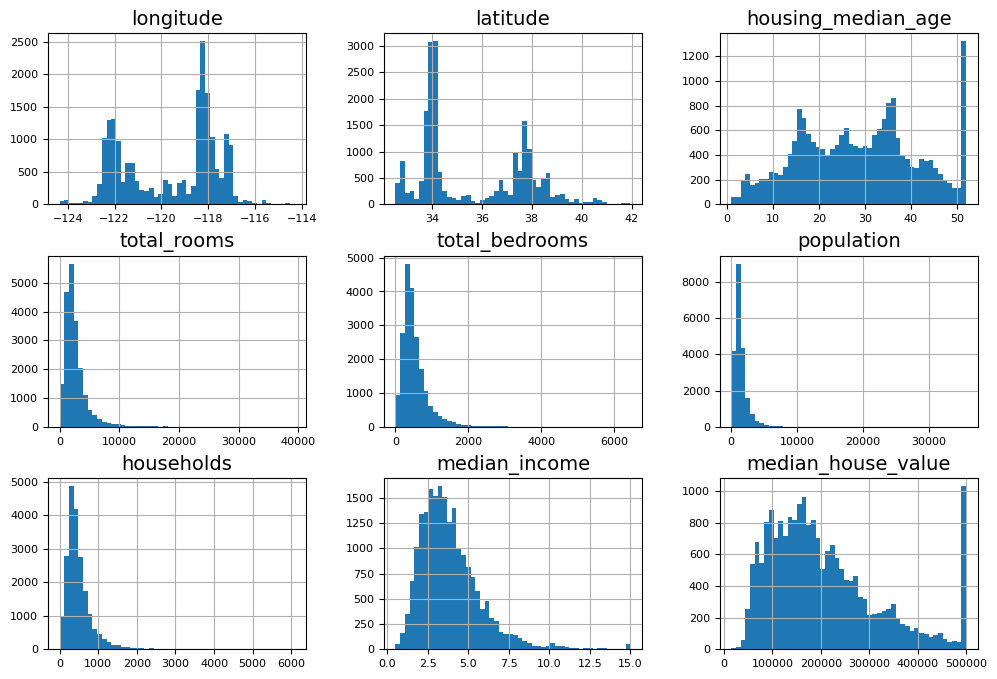

In [67]:
import matplotlib.pyplot as plt

# The next 5 lines define the default font sizes
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

Looking at these histograms, we can make a few observations: 
- First, the _median_income_ attribute doesn't look like it is right. Even in the 1990s, it's unlikely that the median income was in a range from 0 to 15 dollars. It turns out that this value is expresssed in tens of thousands of dollars, so a value of 3 represents an income of $30,000. The value is also capped at 15, but it doesn't look like there are many values that were affected by the cap. Still, it's useful to know.
- The _housing_median_age_ and _median_house_value_ attributes were also capped. This is clear from the big spike of values at the right end of the axis (age 52 and $500,000 house value). This is important to be aware of, because our ML algorithm might "learn" that nobody is older than 52 or has a house that costs more than $500,000 if we aren't careful about how we train it from this data.
- All the attributes have different scales. We'll need to _normalize_ them for our ML algorithm.
- Finally, many of the histograms are _skewed_: they have long tails to the right. This may make it harder for the ML algorithms to detect patterns. We probably need to transform these attributes to have more symmetrical (bell-shaped) distributions.

## Create a Test Set

We want to randomly shuffle and split the data into training and test sets. However, we want this to happen the same way every time we train the model, because we want to have a test set that the model never sees in training no matter how many times we run this notebook. One way to do that is to set the Python _random seed_. The seed value is used to initialize the random-number generator, and it's usually different every time a program runs, so by picking a fixed value for the seed we will always get the same series of "random" numbers from the generator.

In [68]:
import numpy as np

np.random.seed(42)

Now we define a Python function that will create a random permutation of the data and create two lists, one for training data and another for test data.

In [69]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Now we can call the function we just defined on our housing data set, with an 80-20 split (80% of the data will be used to train, 20% to test).

In [70]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [71]:
len(train_set)

16512

In [72]:
len(test_set)

4128

The next few cells show a more sophisticated way to split the data.

In [73]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [74]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [75]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

There's also a built-in function of Scikit-Learn called _train_test_split()_ which does pretty much the same thing as the _shuffle_and_split_data()_ function we defined above, with a parameter that lets you set the random state.

In [76]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [77]:
test_set["total_bedrooms"].isnull().sum()

44

The methods we've looked at so far are called _random sampling_ methods. This is generally fine if your dataset is large enough, but there is a risk of introducing _sampling bias_. For example, the US population is 51.1% females and 48.9% males, so a well-conducted survey of 1,000 individuals would try to maintain a ratio of 511 female and 489 male respondents (if it seems plausible that people's answers may be influenced by this attribute). 

To find the probability that a random sample of 1,000 people contains less than 48.5% female or more than 53.5% female when the population's female ratio is 51.1%, we use the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). The `cdf()` method of the binomial distribution gives us the probability that the number of females will be equal or less than the given value.

In [78]:
from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929925


Here's another way to get the same result (about a 10.7% chance of a biased sample) using a simulation:

In [79]:
np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

Let's take the median income attribute (which is a continuous numerical attribute) and create a categorical attribute with 5 strata. The next cell uses the _pd.cut()_ function to create an income category attribute with five categories, splitting the 0-15 range from the original data set into bins of 0-1.5, 1.5-3.0, and so on. Then we'll plot the figure to see if it looks like a more smooth distribution than our original data values did.

In [80]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

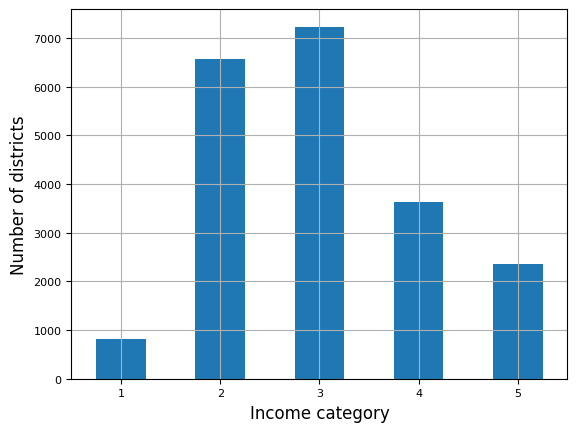

In [81]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

The next few cells show different ways to do stratified sampling from our new income category attribute.

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [83]:
strat_train_set, strat_test_set = strat_splits[0]

In [84]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [85]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [86]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [87]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [88]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

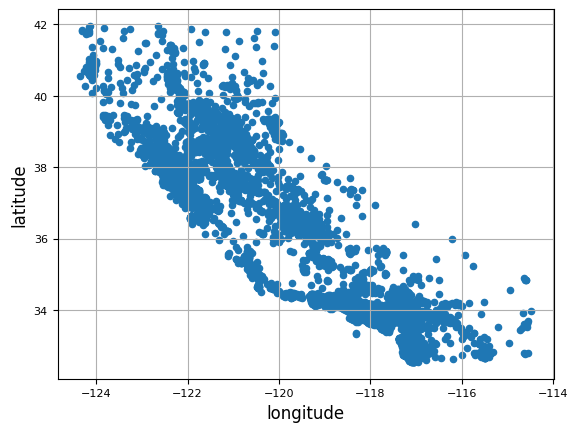

In [89]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

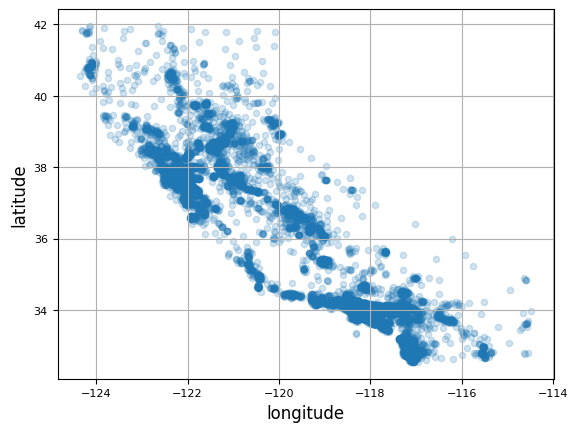

In [90]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

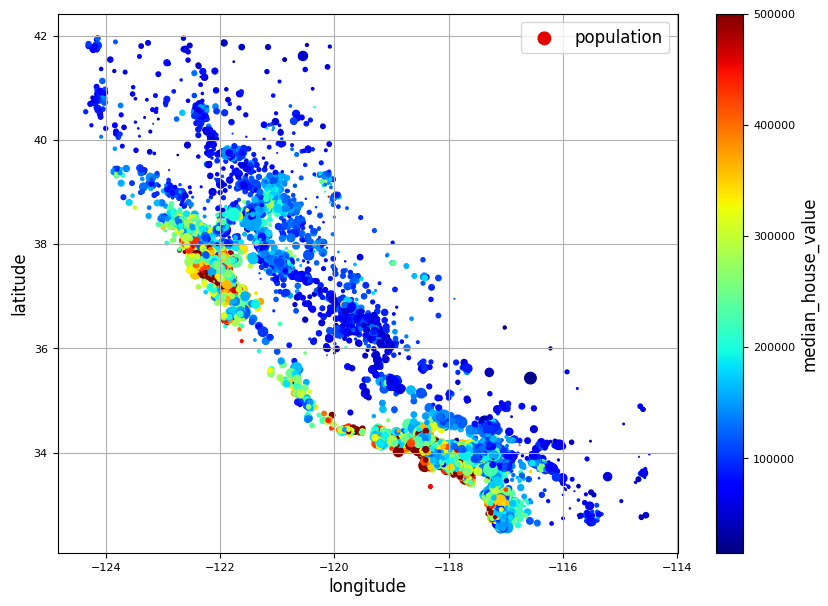

In [91]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Looking for Correlations

In [92]:
housing.drop('ocean_proximity', axis=1, inplace=True)

In [93]:
corr_matrix = housing.corr()

In [94]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

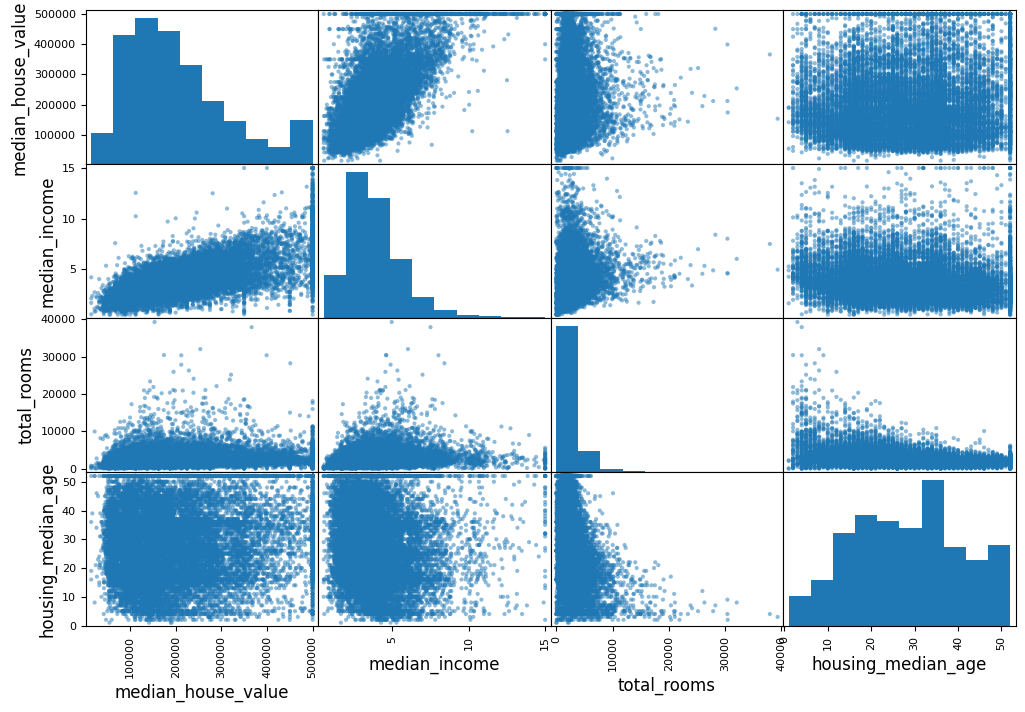

In [95]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

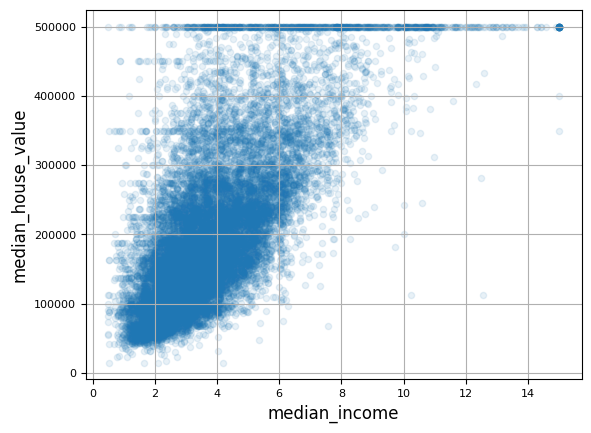

In [96]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

## Experimenting with Attribute Combinations

In [97]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [98]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64